# Data processing for AFM Testbed

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from os import path
import ipywidgets as widgets
import rosbag
from nav_msgs.msg import Odometry
from sensor_msgs.msg import LaserScan
from std_msgs.msg import Int32MultiArray
from geometry_msgs.msg import TwistStamped

import math
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import h5py
import pandas as pd
%matplotlib notebook 

In [2]:
#wirelessIMUDataPath = "Comparison_test_Left_all_Trials.csv"
#PUREIMUdataPath = "Comparison_test_Left_all_Trials.bag"
#PUREtimeOffset = 1.5
#SamplingFrequency = 47.25 #Hz

#wirelessIMUDataPath = "Comparison_test_Right_all_Trials.csv"
#PUREIMUdataPath = "Comparison_test_Right_all_Trials.bag"
#PUREtimeOffset = 1.2
#SamplingFrequency = 47.3 #Hz

wirelessIMUDataPath = "Comparison_test_Left_all_Trials_2_full.csv"
PUREIMUdataPath = "Comparison_test_Left_all_Trials_2_full.bag"
PUREtimeOffset = 1.2
SamplingFrequency = 46.1 #Hz

In [3]:
#read data from wireless IMU recordings
wirelessIMUData = pd.read_csv(wirelessIMUDataPath)
wirelessIMUData["time"] = wirelessIMUData.index.to_numpy() / SamplingFrequency
#read data from PURE IMU rosbag
bag = rosbag.Bag(PUREIMUdataPath, "r")

stateFeedback = np.zeros((5,bag.get_message_count('/roboRIO/stateFeedback')))
i = 0
for topic, msg, t in bag.read_messages(topics='/roboRIO/stateFeedback'):
    for j in range(5):
        stateFeedback[j,i] = msg.data[j+6]
    i+=1

PUREIMUdata = pd.DataFrame(stateFeedback[4,:],columns = ["yaw"])
PUREIMUdata["time"] = np.linspace(0,len(stateFeedback[0,:])/400,len(stateFeedback[0,:])) + PUREtimeOffset


<IPython.core.display.Javascript object>


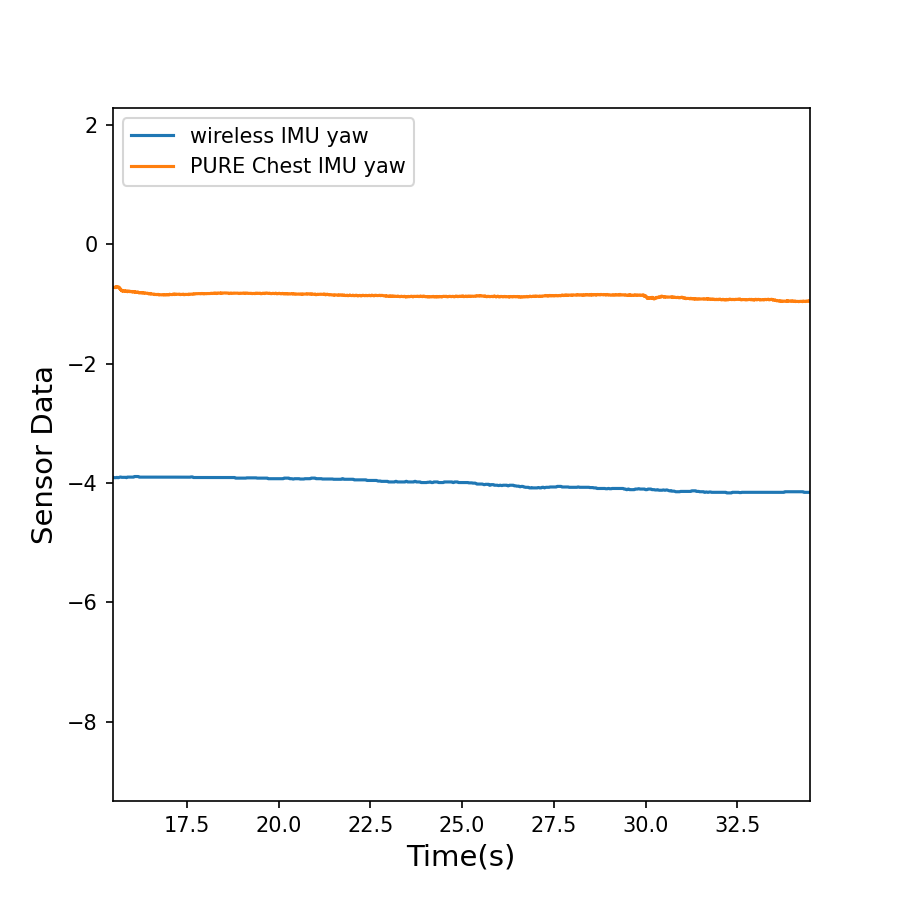

In [4]:
fig,ax = plt.subplots(figsize=(6, 6))
ax.plot(wirelessIMUData.time,wirelessIMUData.x - wirelessIMUData.x[1],label='wireless IMU yaw')
ax.plot(PUREIMUdata.time,-PUREIMUdata.yaw + PUREIMUdata.yaw[1],label='PURE Chest IMU yaw')
ax.set_xlabel("Time(s)", fontsize = 14)
ax.set_ylabel("Sensor Data", fontsize = 14)
ax.legend(loc='upper left')
fig.show()

In [ ]:
fig,ax = plt.subplots(figsize=(6, 6))
ax.plot(wirelessIMUData.time,wirelessIMUData.x - wirelessIMUData.x[1],label='wireless IMU yaw')
ax.plot(PUREIMUdata.time,-PUREIMUdata.yaw + PUREIMUdata.yaw[1],label='PURE Chest IMU yaw')
ax.set_xlabel("Time(s)", fontsize = 14)
ax.set_ylabel("Sensor Data", fontsize = 14)
ax.legend(loc='upper left')
fig.show()